In [46]:
import re
import pandas as pd
import numpy as np

In [1]:
'''
Renaming the columns
'''

CompositeAllCoopData = pd.read_csv('Data from rejestr.io/CompositeAllCoopData.csv')
old_columns = CompositeAllCoopData.columns.tolist()
snake_columns = [c.replace('.','_') for c in old_columns]
CompositeAllCoopData.columns = snake_columns
CompositeAllCoopData

NameError: name 'pd' is not defined

In [48]:
def dispall(data):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    display(data)
    pd.set_option('display.max_rows', 10)
    pd.set_option('display.max_columns', 10)
    
def dispwide(data):
    
    pd.set_option('display.max_columns', None)
    display(data)
    pd.set_option('display.max_columns', 10)

def number_of_csv_files(dir):
    only_files = [f for f in os.listdir(dir) if f[-4:]=='.csv']
    return len(only_files)


def list_of_csv_files(dir):
    only_files = [dir + f for f in os.listdir(dir) if f[-4:]=='.csv']
    return only_files

def isNaN(num):
    return num != num



# Mapping Cooperaives with Geopandas






In [85]:
wimport matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [46]:
data = pd.read_csv(r'Data from rejestr.io/Coop_Coordinates.csv')

data = data.loc[
    (data['longitude']>14) &
    (data['longitude']<24.3) &w
    (data['latitude']<55)&
    (data['latitude']>48.9)]

crs={'init':'epsg:4326'}

geometry=[Point(xy) for xy in zip(data["longitude"], data["latitude"])]
# geometry

geodata=gpd.GeoDataFrame(data,crs=crs, geometry=geometry)
# geodata.plot()

Poland_shapefile = gpd.read_file(r'Shape files/pol_adm_gov_v02_20220414_SHP/pol_admbnda_adm1_gov_v02_20220414.shp')

Text(92.09722222222221, 0.5, 'Latitude')

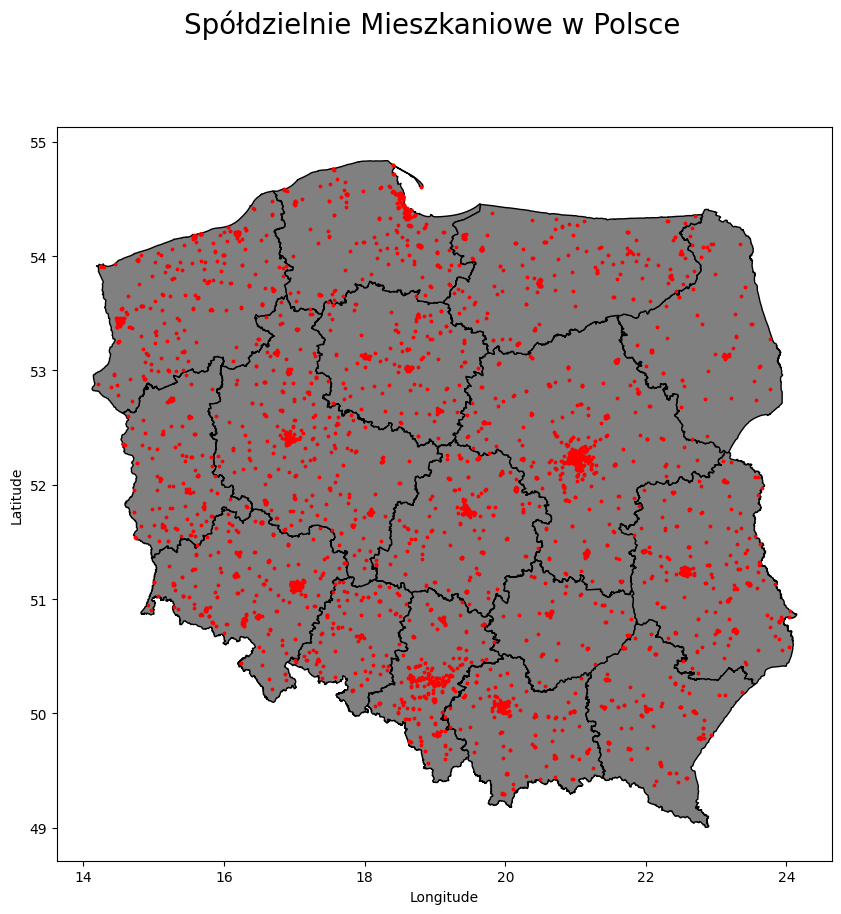

In [51]:
fig, ax = plt.subplots(figsize=(10,10))

Poland_shapefile.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=1)

geodata.plot(ax=ax, color='red', markersize=3);

fig.suptitle('Spółdzielnie Mieszkaniowe w Polsce', fontsize=20)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')

# Coop names analysis

In [72]:
CompositeAllCoopData = pd.read_csv('Data from rejestr.io/CompositeAllCoopData.csv')

In [73]:
CompositeAllCoopData.columns.tolist()

['id',
 'typ',
 'adres.kod',
 'adres.miejscowosc',
 'adres.nr_domu',
 'adres.nr_mieszkania',
 'adres.panstwo',
 'adres.poczta',
 'adres.teryt.gmina',
 'adres.teryt.powiat',
 'adres.teryt.wojewodztwo',
 'adres.ulica',
 'glowna_osoba.id',
 'glowna_osoba.imiona_i_nazwisko',
 'krs_powiazania_liczby.aktualne',
 'krs_powiazania_liczby.przeszle',
 'krs_rejestry.rejestr_przedsiebiorcow_data_wpisu',
 'krs_wpisy.najnowszy_data',
 'krs_wpisy.najnowszy_numer',
 'krs_wpisy.pierwszy_data',
 'metadane.krs_odpis_synchronizacja_data_czas',
 'nazwy.pelna',
 'nazwy.skrocona',
 'numery.krs',
 'numery.nip',
 'numery.regon',
 'stan.czy_dofinansowana_przez_ue',
 'stan.czy_jest_na_gpw',
 'stan.czy_otrzymala_pomoc_publiczna',
 'stan.czy_pozytku_publicznego',
 'stan.czy_spolka_skarbu_panstwa',
 'stan.czy_wykreslona',
 'stan.forma_prawna',
 'stan.pkd_przewazajace_dzial',
 'stan.w_likwidacji',
 'stan.w_upadlosci',
 'stan.w_zawieszeniu',
 'stan.wielkosc',
 'kontakt.www',
 'kontakt.emaile',
 'krs_rejestry.rejestr_p

In [74]:
from collections import Counter

def count_word_frequency(names):
    # flatten the list of names and convert them to lowercase
    words = [word.lower() for name in names for word in name.split()]

    # count the frequency of each word
    word_counts = Counter(words)

    # calculate the percentage of names that contain each word
    name_count = len(names)
    word_percentages = {word: count / name_count * 100 for word, count in word_counts.items()}

    # create a DataFrame with the results
    df = pd.DataFrame({'word': list(word_counts.keys()),
                       'count': list(word_counts.values()),
                       'percentage': list(word_percentages.values())})
    return df

In [75]:
CompositeAllCoopData['nazwy.pelna']

0                      SPÓŁDZIELNIA MIESZKANIOWA "OSTOJA"
1               SPÓŁDZIELNIA MIESZKANIOWA "LEŚNY ZAKĄTEK"
2                    SPÓŁDZIELNIA MIESZKANIOWA "NOWA ERA"
3                    SPÓŁDZIELNIA MIESZKANIOWA "BEŁDAN 4"
4       SPÓŁDZIELNIA BUDOWLANO - MIESZKANIOWA FLORIDA ...
                              ...                        
3706    SPÓŁDZIELNIA MIESZKANIOWA LOKATORSKO-WŁASNOŚCI...
3707       SPÓŁDZIELNIA BUDOWLANO MIESZKANIOWA "CHEŁMSKA"
3708       SPÓŁDZIELNIA BUDOWLANO-MIESZKANIOWA "BUKOWINA"
3709    SPÓŁDZIELNIA MIESZKANIOWO-BUDOWLANA "NASZ DOM"...
3710    SPÓŁDZIELNIA MIESZKANIOWA "WSPÓLNOTA" W GŁADYS...
Name: nazwy.pelna, Length: 3711, dtype: object

In [177]:
frequencies.sort_values('count',ascending=False).head(30).word.tolist()

['spółdzielnia',
 'mieszkaniowa',
 'w',
 'własnościowa',
 'lokatorsko',
 'likwidacji',
 'budowlano',
 'dom',
 'samopomoc',
 'chłopska',
 'gminna',
 'im',
 'przy',
 'usługowa',
 'międzyzakładowa',
 'osiedle',
 'pracy',
 'nasz',
 'młodzieżowa',
 'mała',
 'i',
 'właścicieli',
 'domów',
 'budowy',
 'jednorodzinnych',
 'powszechna',
 'społem',
 'mieszkaniowo',
 'budownictwa',
 'pracowników']

In [78]:
# removing inwanted characters
list_of_names = [re.sub(r'[^\w]', ' ', n) for n in CompositeAllCoopData.nazwy_pelna.tolist()]

# Counting and sorting frequencies
frequencies = count_word_frequency(list_of_names)
frequencies.sort_values('count',ascending=False).head(30)

,word,count,percentage
0,spółdzielnia,3684,99.272433
1,mieszkaniowa,3176,85.583401
25,w,1712,46.133118
91,własnościowa,391,10.536244
31,lokatorsko,321,8.649960
53,likwidacji,288,7.760711
9,budowlano,231,6.224737
22,dom,137,3.691727
85,samopomoc,124,3.341417
86,chłopska,114,3.071948


In [79]:
# Insight
[ name for name in list_of_names if 'chłopska'in name.lower()]

['GMINNA SPÓŁDZIELNIA SAMOPOMOC CHŁOPSKA W SOSNÓWCE',
 'GMINNA SPÓŁDZIELNIA  SAMOPOMOC CHŁOPSKA  W JEDLIŃSKU W LIKWIDACJI',
 'GMINNA SPÓŁDZIELNIA  SAMOPOMOC CHŁOPSKA  W KRASZEWICACH W LIKWIDACJI',
 'GMINNA SPÓŁDZIELNIA  SAMOPOMOC CHŁOPSKA  W PŁOŃSKU',
 'GMINNA SPÓŁDZIELNIA  SAMOPOMOC CHŁOPSKA  W BRWINOWIE W LIKWIDACJI',
 'GMINNA SPÓŁDZIELNIA  SAMOPOMOC CHŁOPSKA ',
 'TARNOBRZESKA SPÓŁDZIELNIA ZAOPATRZENIA I ZBYTU  SAMOPOMOC CHŁOPSKA ',
 'GMINNA SPÓŁDZIELNIA  SAMOPOMOC CHŁOPSKA  W ŻMIGRODZIE W LIKWIDACJI',
 'GMINNA SPÓŁDZIELNIA  SAMOPOMOC CHŁOPSKA ',
 'GMINNA SPÓŁDZIELNIA  SAMOPOMOC CHŁOPSKA  W LIKWIDACJI',
 'GMINNA SPÓŁDZIELNIA  SAMOPOMOC CHŁOPSKA  W KOZACH',
 'GMINNA SPÓŁDZIELNIA  SAMOPOMOC CHŁOPSKA  W BYTOWIE',
 'GMINNA SPÓŁDZIELNIA  SAMOPOMOC CHŁOPSKA  W OBORNIKACH ŚLĄSKICH',
 'GMINNA SPÓŁDZIELNIA  SAMOPOMOC CHŁOPSKA  W NIEBOROWIE',
 'GMINNA SPÓŁDZIELNIA SAMOPOMOC CHŁOPSKA W GOŁCZY',
 'GMINNA SPÓŁDZIELNIA  SAMOPOMOC CHŁOPSKA  W ELBLĄGU W LIKWIDACJI',
 'GMINNA SPÓŁDZIELNIA  SAMOPOMOC 

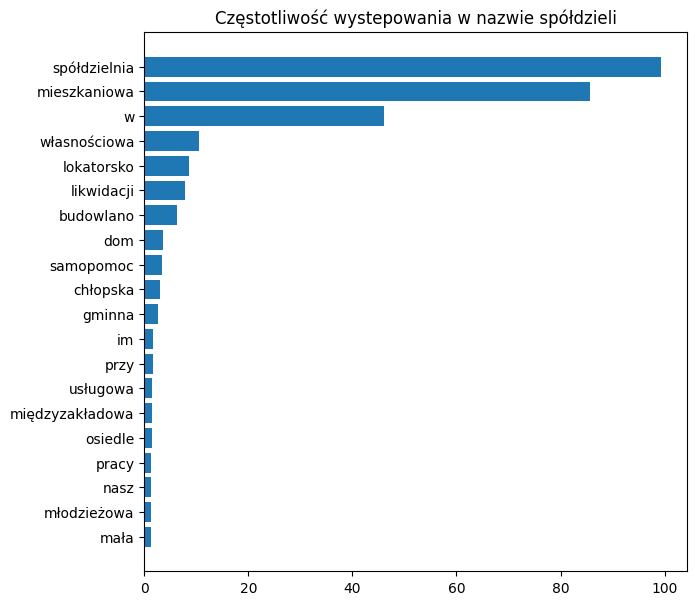

In [86]:
# Plot
sorted_frequencies_30 = frequencies.sort_values('count',ascending=False).head(20)
fig, ax = plt.subplots(figsize=(7,7), dpi=100)

ax.barh(sorted_frequencies_30.word, width=sorted_frequencies_30.percentage)
ax.invert_yaxis()
plt.title('Częstotliwość wystepowania w nazwie spółdzieli');

# Word clustering mased on word2vector and word embedings

In [49]:
words = [word.lower() for name in list_of_names for word in name.split()]
unique_words = [] 
[unique_words.append(x) for x in words if x not in unique_words]
pass

NameError: name 'list_of_names' is not defined

In [95]:
# unique_words = ['samochód', 'kotdsakdhasad', 'pies', 'drzewo', 'dom', 'woda', 'ziemia', 'słońce', 'księżyc', 'ptak']

embeddings = np.zeros((len(unique_words), 300))
for i, word in enumerate(unique_words):
    if word in model:
        embeddings[i] = model[word]

num_clusters = 50
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(embeddings)

for i in range(num_clusters):
    cluster = np.where(kmeans.labels_ == i)[0]
    words_in_cluster = [unique_words[j] for j in cluster]
    print(f'Cluster {i+1}: {words_in_cluster}')

NameError: name 'KMeans' is not defined

# Words similarity by word2vector with Fasttext

## Libraries

In [3]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import fasttext
import sys 
import os

## Loading FastText model

In [4]:
# Load a pre-trained word embeddings model (e.g. GloVe or fastText)
# For example, we'll use fastText here
import fasttext

# moving to directory where the model is stored
home = os.getcwd()
os.chdir('C:\Świetlik\Code\Word to vector PL fb')

# loading the model
model = fasttext.load_model('cc.pl.300.bin')

# moving to home directory
os.chdir(home)

## FastText Categorization tester

In [15]:
# Define list A of names
A = ['dobrze','super','przyjaźń','radość','chujnia','pęknięcie', 'dom','morderca','pamiętnik',
     'rośliny','las', 'drzwi','magia','niecka', 'krajobraz', 'kopalnia','hutnik','metal', 'marynarz','wspólny dom']

# Define representative names
rep_names = ['przyszłość', 'dom', 'robotnik','praca', 'drzewo']

threshold = 0.30


# For each representative name, find similar names in list A
for rep_name in rep_names:
    rep_vector = model.get_word_vector(rep_name)
    sim_scores = cosine_similarity([rep_vector], [model.get_word_vector(name) for name in A]).flatten()
    # print(sim_scores)
    # sim_names = [A[i] for i in np.argsort(-sim_scores) if A[i] != rep_name][:5]
    sim_names = [A[i] for i, sim_score in enumerate(sim_scores) if A[i] != rep_name and sim_score > threshold]
    print("Similar names for", rep_name, ":", sim_names)

Similar names for przyszłość : ['przyjaźń', 'radość', 'magia']
Similar names for dom : ['pamiętnik', 'las', 'krajobraz']
Similar names for robotnik : ['morderca', 'hutnik', 'marynarz']
Similar names for praca : ['przyjaźń', 'radość', 'chujnia', 'magia', 'kopalnia']
Similar names for drzewo : ['pęknięcie', 'dom', 'rośliny', 'las', 'drzwi']


## Functions for evaluating similarity 

In [52]:
def find_similar_names(model, A, rep_name, threshold):

    rep_vector = model.get_word_vector(rep_name)
    
    # Calculate cosine similarity scores between representative name and all names in list A
    sim_scores = cosine_similarity([rep_vector], [model.get_word_vector(name) for name in A]).flatten()
    
    # Filter names based on threshold value
    sim_names = [A[i] for i, sim_score in enumerate(sim_scores) if A[i] != rep_name and sim_score > threshold]
    
    # Return similar names above threshold
    return sim_names

In [53]:
def most_similar_pair(list1, list2, model):
    max_sim = 0
    for s1 in list1:
        for s2 in list2:
            v1 = model.get_sentence_vector(s1).reshape(1,-1)
            v2 = model.get_sentence_vector(s2).reshape(1,-1)
            sim = cosine_similarity(v1, v2)[0][0]
            if sim > max_sim:
                max_sim = sim
    return max_sim

## Functions for clening the names

In [57]:
def extract_in_quotations(string):
    first_quote = string.find('"')
    second_quote = string.find('"', first_quote + 1)
    if first_quote == -1 or second_quote == -1:
        return np.nan
    return string[first_quote + 1:second_quote]

def delete_strings(string, strings_to_delete):
    for s in strings_to_delete:
        string = string.replace(s, '')
    return string

def extract_after(string, start_string):
    index = string.find(start_string)
    if index != -1:
        return string[index:]
    else:
        return None

def clean_s(s):
    try:
        # Remove numbers and special signs
        s = ''.join(filter(lambda x: x.isalpha() or x.isspace(), s))

        # Remove double spaces
        s = ' '.join(s.split())

        # Remove spaces at the beginning and end of the string
        s = s.strip()

        # Remove trailing accesses
        s = s.rstrip('.')
        return s
    except:
        return np.nan

In [58]:
input_string = 'The quick brown fox jumps over the lazy dog.'
strings_to_delete = ['spółdzielnia',
                    'budowlano-mieszkaniowa',
                    'budowlano - mieszkaniowa',
                    'mieszkaniowa',
                    'socjalna',
                    'lokatorsko-własnościowa',
                    'budowlano',
                    'lokatorsko - własnościowa',
                    'w likwidacji',
                    'rzemieślnicza',
                    'handlowa',
                    'usługowa',
                    'właścicieli',
                    'apartamenty',
                    'spółdzielcza',
                    'lokatorsko',
                    'własnościowo',
                    'inwestycyjno-budowlana',
                    'zarządzanie',
                    'nieruchomościami',
                    'osiedle',
                    'powszechna',
                    'towarzystwo',
                    'budownictwa',
                    'społecznego',
                    ]

## Extracting key words from coop names

In [59]:
focus = CompositeAllCoopData[['nazwy_pelna','id']].copy()
focus.nazwy_pelna = focus.nazwy_pelna.str.lower()

mask1 = focus.nazwy_pelna.str.startswith('"') & focus.nazwy_pelna.str.endswith('"'),'nazwy_pelna'
focus.loc[mask1] = focus.loc[mask1].apply(lambda x: x[1:-1])

mask2 = focus.nazwy_pelna.str.count('"') == 1,'nazwy_pelna'
focus.loc[mask2] = focus.loc[mask2].apply(lambda x: x.replace('"', ''))

mask2 = focus.nazwy_pelna.str.count("'") == 1,'nazwy_pelna'
focus.loc[mask2] = focus.loc[mask2].apply(lambda x: x.replace("'", ''))

# display(focus.loc[mask1])

Conditions = [
    {'condition': lambda x: '"'in x, 'flag': lambda x: 'nazwa własna', 'value1': lambda x: clean_s(extract_in_quotations(x)).split()},
    {'condition': lambda x: 'im.' in x or ' im ' in x, 'flag': lambda x: 'patron', 'value1': lambda x: extract_after(x,' im')},
    {'condition': lambda x: ' w ' in delete_strings(x, [' w likwidacji']), 'flag': lambda x: 'miejsce', 'value1': lambda x: delete_strings(extract_after(x,' w '), [' w likwidacji'])},
    {'condition': lambda x: True, 'flag': lambda x: 'inne', 'value1': lambda x: clean_s(delete_strings(x, strings_to_delete)).split()}
    ]

# loop over the conditions and apply the corresponding value to the dataframe
for i, row in focus.iterrows():
    for condition in Conditions:
        if condition['condition'](row['nazwy_pelna']):
            # print(row['nazwy_pelna'])
            focus.at[i, 'flag'] = condition['flag'](row['nazwy_pelna'])
            focus.at[i, 'value1'] = condition['value1'](row['nazwy_pelna'])
            break

# dispall(focus.iloc[3358])
dispall(focus[156:180])

,nazwy_pelna,id,flag,value1
156,spółdzielnia gospodarki mieszkaniowej w ośnie ...,368480,miejsce,w ośnie lubuskim
157,własnościowa spółdzielnia mieszkaniowa w księż...,368220,miejsce,w księżowoli
158,"spółdzielnia mieszkaniowa ""puchatek"" w krakowie",366578,nazwa własna,[puchatek]
159,"spółdzielnia mieszkaniowa ""osiedle"" w michałowie",365307,nazwa własna,[osiedle]
160,"spółdzielnia mieszkaniowa ""akademia 2""",363110,nazwa własna,[akademia]
161,"rolnicza spółdzielnia produkcyjna ""odnowa"" w k...",361426,nazwa własna,[odnowa]
162,spółdzielnia budowlano - mieszkaniowa im. prof...,360698,patron,im. prof. jana czarnockiego
163,"spółdzielnia mieszkaniowa ""mostki"" w likwidacji",358242,nazwa własna,[mostki]
164,spółdzielnia mieszkaniowa w kaplonosach,354402,miejsce,w kaplonosach
165,"spółdzielnia mieszkaniowa ""w dolinie"" w gryfow...",353984,nazwa własna,"[w, dolinie]"


## Defining categories and focal words

In [60]:
A = set()
[A.update(i) for i in focus.value1.tolist()]
A=list(A)

In [61]:
category1 = {'name': 'optymistyczne',
             'parameters':{'przyszłość':0.5, 'marzenie':0.5, 'nadzieja':0.5},
             'words':set()}

category2 = {'name': 'dom',
             'parameters':{'dom':0.5, 'rodzina':0.5,'sąsiedztwo':0.4,'wspólnota':0.4},
             'words':set()}

category3 = {'name': 'zawód',
             'parameters':{'zawód':0.5, 'górnik':0.5,'praca':0.5,'nauczyciel':0.5},
             'words':set()}

category4 = {'name': 'przyroda',
             'parameters':{'las':0.4, 'łąka':0.4,'przyroda':0.4,'natura':0.4},
             'words':set()}

category5 = {'name': 'geografia',
             'parameters':{'polska':0.4, 'region':0.4,'dzielnica':0.4,'geografia':0.4,'miasto':0.4,'warszawa':0.4,'mazowsze':0.4},
             'words':set()}

category6 = {'name': 'imiona',
             'parameters':{'imie':0.4,'ewa':0.4,'adam':0.4,'jan':0.4},
             'words':set()}

categories = [category1, category2, category3, category4, category5, category6]

for category in categories:
    for rep_name, threshold in category['parameters'].items():
        category['words'].update(find_similar_names(model=model, A=A, rep_name=rep_name, threshold=threshold))

categorisation = pd.DataFrame(categories)
categorisation

,name,parameters,words
0,optymistyczne,"{'przyszłość': 0.5, 'marzenie': 0.5, 'nadzieja...","{pragnienie, radość, zachęta, przeszłość, marz..."
1,dom,"{'dom': 0.5, 'rodzina': 0.5, 'sąsiedztwo': 0.4...","{dworek, towarzystwo, giełda, łaska, domek, sp..."
2,zawód,"{'zawód': 0.5, 'górnik': 0.5, 'praca': 0.5, 'n...","{współpraca, nauczyciela, informatyk, metalowi..."
3,przyroda,"{'las': 0.4, 'łąka': 0.4, 'przyroda': 0.4, 'na...","{dworek, polanka, pachnąca, wanacja, polana, p..."
4,geografia,"{'polska': 0.4, 'region': 0.4, 'dzielnica': 0....","{olsztyńska, ostrowska, zakątek, jabłonna, gło..."
5,imiona,"{'imie': 0.4, 'ewa': 0.4, 'adam': 0.4, 'jan': ...","{agnieszka, lech, olga, gosia, emka, jan, ken,..."


## Evaluating distance to each category

In [62]:
for i, row in focus.iterrows():
    # print(row)
    for category in categories:
        # for key, value in category['parameters'].items():
            
            focus.at[i, category['name']] = most_similar_pair(row['value1'], category['parameters'].keys(), model=model)
        # focus.at[i, category['name']] = category['parameters'] condition['flag'](row['nazwy_pelna'])

## Assigning category

In [63]:
threshold = 0.1

columns = [category['name'] for category in categories]
# Create new column with name of column containing highest value above threshold
focus['best match'] = focus[columns].apply(lambda x: x.idxmax() if x.max() > threshold else np.nan, axis=1)
# focus

In [64]:
focus['category'] = focus['best match']

# moving pathron and place
maks = (focus['best match'].isna()) & ((focus['flag'] == 'patron')|(focus['flag'] == 'miejsce'))
focus.loc[maks, 'category'] = focus.loc[maks, 'flag']
dispall(focus[200:220])

,nazwy_pelna,id,flag,value1,optymistyczne,dom,zawód,przyroda,geografia,imiona,best match,category
200,"spółdzielnia budowy domów jednorodzinnych ""s.o...",332215,nazwa własna,[sos],0.067276,0.268478,0.223102,0.269111,0.243058,0.080716,przyroda,przyroda
201,spółdzielnia mieszkaniowa lokatorsko - własnoś...,332134,miejsce,w glinojecku,0.101857,0.087662,0.067995,0.124156,0.185693,0.318095,imiona,imiona
202,"młodzieżowa spółdzielnia mieszkaniowa ""msm"" w ...",331999,nazwa własna,[msm],0.000000,0.017628,0.056209,0.083205,0.254808,0.351585,imiona,imiona
203,"spółdzielnia budowlano-mieszkaniowa ""podleśna""",330634,nazwa własna,[podleśna],0.223249,0.232785,0.261399,0.264779,0.236433,0.076098,przyroda,przyroda
204,"spółdzielnia mieszkaniowa ""nadzieja"" w wyczechach",330483,nazwa własna,[nadzieja],1.000000,0.351980,0.327686,0.337312,0.307124,0.141440,optymistyczne,optymistyczne
205,"spółdzielnia mieszkaniowa ""perkun""",329877,nazwa własna,[perkun],0.187687,0.289540,0.256334,0.237344,0.223185,0.185598,dom,dom
206,międzyzakładowa spółdzielnia mieszkaniowa loka...,329833,miejsce,w pułtusku,0.056287,0.087662,0.055957,0.100380,0.185693,0.330833,imiona,imiona
207,"spółdzielnia mieszkaniowa ""zachęta""",329540,nazwa własna,[zachęta],0.506007,0.337016,0.347761,0.283828,0.261223,0.091068,optymistyczne,optymistyczne
208,"spółdzielnia mieszkaniowa ""tol-dom"" w tolku",328655,nazwa własna,[toldom],0.146312,0.115904,0.071279,0.065571,0.119590,0.137135,optymistyczne,optymistyczne
209,spółdzielnia mieszkaniowa lokatorsko-własności...,327572,nazwa własna,[talizman],0.273220,0.353750,0.309222,0.208211,0.218106,0.210823,dom,dom


## Review categories

In [65]:
assigned_obs = focus.groupby('category')['value1'].count().sum()
all_obs = focus.id.count()
print( assigned_obs, ' out of  ',all_obs, ' got assigned, that is ', assigned_obs/all_obs*100)

focus.groupby('category')['value1'].count()

3640  out of   3711  got assigned, that is  98.08676906494206


category
dom              685
geografia        891
imiona           875
optymistyczne    261
przyroda         386
zawód            542
Name: value1, dtype: int64

In [66]:
# Replace missing categories with "unassigned"
focus['category'] = focus['category'].fillna('unassigned')

names_dict = focus.groupby('category')['value1'].apply(list).to_dict()

# Find the length of the longest category list
max_len = max(map(len, names_dict.values()))

# Pad each category list with np.nan values to match max_len
for category in names_dict:
    names_dict[category] += [np.nan] * (max_len - len(names_dict[category]))

# Create the output DataFrame from the dictionary
output_df = pd.DataFrame(names_dict)
dispall(output_df)

,dom,geografia,imiona,optymistyczne,przyroda,unassigned,zawód
0,"[florida, houses]","[nowa, era]",ostoja,[iskierka],"[leśny, zakątek]",[],[atutowa]
1,"[osób, prawnych, dom]",[bełdan],[ewa],[mieszkaniowoadministracyjna],"[siwy, dym]",[],[belfer]
2,"[inicjatywa, gospodarcza]","[czarna, góra]",w białce,[zgoda],[perfekta],[],"[przy, sadach]"
3,[administracyjna],[koszykowa],w ostrowie lubelskim,[nowość],[nałęczowska],[],[energetyk]
4,[kwadrat],[nowa],[mw],[nadzieja],[brzoza],[],[stoczniowiec]
5,[dom],[orzesze],[kazimierz],[dłoń],[dąbrówka],[],"[nad, bzurą]"
6,"[lokatorska, borzymy]",[cytadela],w słubicach,[słoneczne],[migdałowa],[],[zamłynie]
7,"[flota, ii]",[tarnowiecka],w szymbarku,[iskra],"[inwestycjna, silezja]",[],[hutnik]
8,[multikompleks],"[nad, wisłą]",w przysusze,[zgoda],[wistula],[],"[przy, filharmonii]"
9,[placówka],[karolew],w wierbce,[promyk],[zorza],[],[colegal]


In [68]:
focus.head(200)

,nazwy_pelna,id,flag,value1,optymistyczne,...,przyroda,geografia,imiona,best match,category
0,"spółdzielnia mieszkaniowa ""ostoja""",1006590,nazwa własna,ostoja,0.101857,...,0.142283,0.149286,0.318095,imiona,imiona
1,"spółdzielnia mieszkaniowa ""leśny zakątek""",990360,nazwa własna,"[leśny, zakątek]",0.167979,...,0.466012,0.422496,0.162290,przyroda,przyroda
2,"spółdzielnia mieszkaniowa ""nowa era""",989448,nazwa własna,"[nowa, era]",0.402065,...,0.350811,0.511108,0.189893,geografia,geografia
3,"spółdzielnia mieszkaniowa ""bełdan 4""",958748,nazwa własna,[bełdan],0.119226,...,0.169882,0.177052,0.125627,geografia,geografia
4,spółdzielnia budowlano - mieszkaniowa florida ...,916521,inne,"[florida, houses]",0.121377,...,0.229845,0.266066,0.251218,dom,dom
...,...,...,...,...,...,...,...,...,...,...,...
195,spółdzielnia nabywców i najemców zasobów miesz...,335139,inne,"[nabywców, i, najemców, zasobów, mieszkaniowyc...",0.254722,...,0.199470,0.267339,0.150991,dom,dom
196,własnościowa spółdzielnia mieszkaniowa w chełmie,334935,miejsce,w chełmie,0.072269,...,0.128152,0.152111,0.269267,imiona,imiona
197,spółdzielnia mieszkaniowa w redzie,333978,miejsce,w redzie,0.072269,...,0.107530,0.122489,0.250444,imiona,imiona
198,lokatorsko własnościowa spółdzielnia mieszkani...,332836,inne,"[własnościowa, zębiec]",0.247144,...,0.280886,0.267113,0.098595,dom,dom


focus.to_csv('Coop_name_category.csv', index=False)

# Similarity map

In [ ]:
import numpy as np
import fasttext
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [ ]:
word_list = A

In [ ]:
embeddings = np.array([model.get_word_vector(word) for word in word_list])

# Apply t-SNE to reduce dimensionality of embeddings for visualization
tsne = TSNE(n_components=2, perplexity=1)
tsne_embeddings = tsne.fit_transform(embeddings)

In [ ]:
fig, ax = plt.subplots(figsize=(40,40))
texts = []
for x, y, word in zip(tsne_embeddings[:, 0], tsne_embeddings[:, 1], word_list):
    texts.append(ax.text(x, y, word, fontsize=10))
    ax.scatter(x, y, alpha=0) # set alpha to 0 to hide the scatter points
    
# Adjust the position of the text labels to avoid overlapping
adjust_text(texts, force_text=0.1, arrowprops=dict(arrowstyle='-', color='white'),save_steps=True,
    save_prefix='q', save_format='jpg')
plt.axis('off')
# Set the axis limits and show the plot
ax.set_xlim(tsne_embeddings[:, 0].min() - 10, tsne_embeddings[:, 0].max() + 10)
ax.set_ylim(tsne_embeddings[:, 1].min() - 10, tsne_embeddings[:, 1].max() + 10)
plt.savefig('chmurka2.jpg')
plt.show()

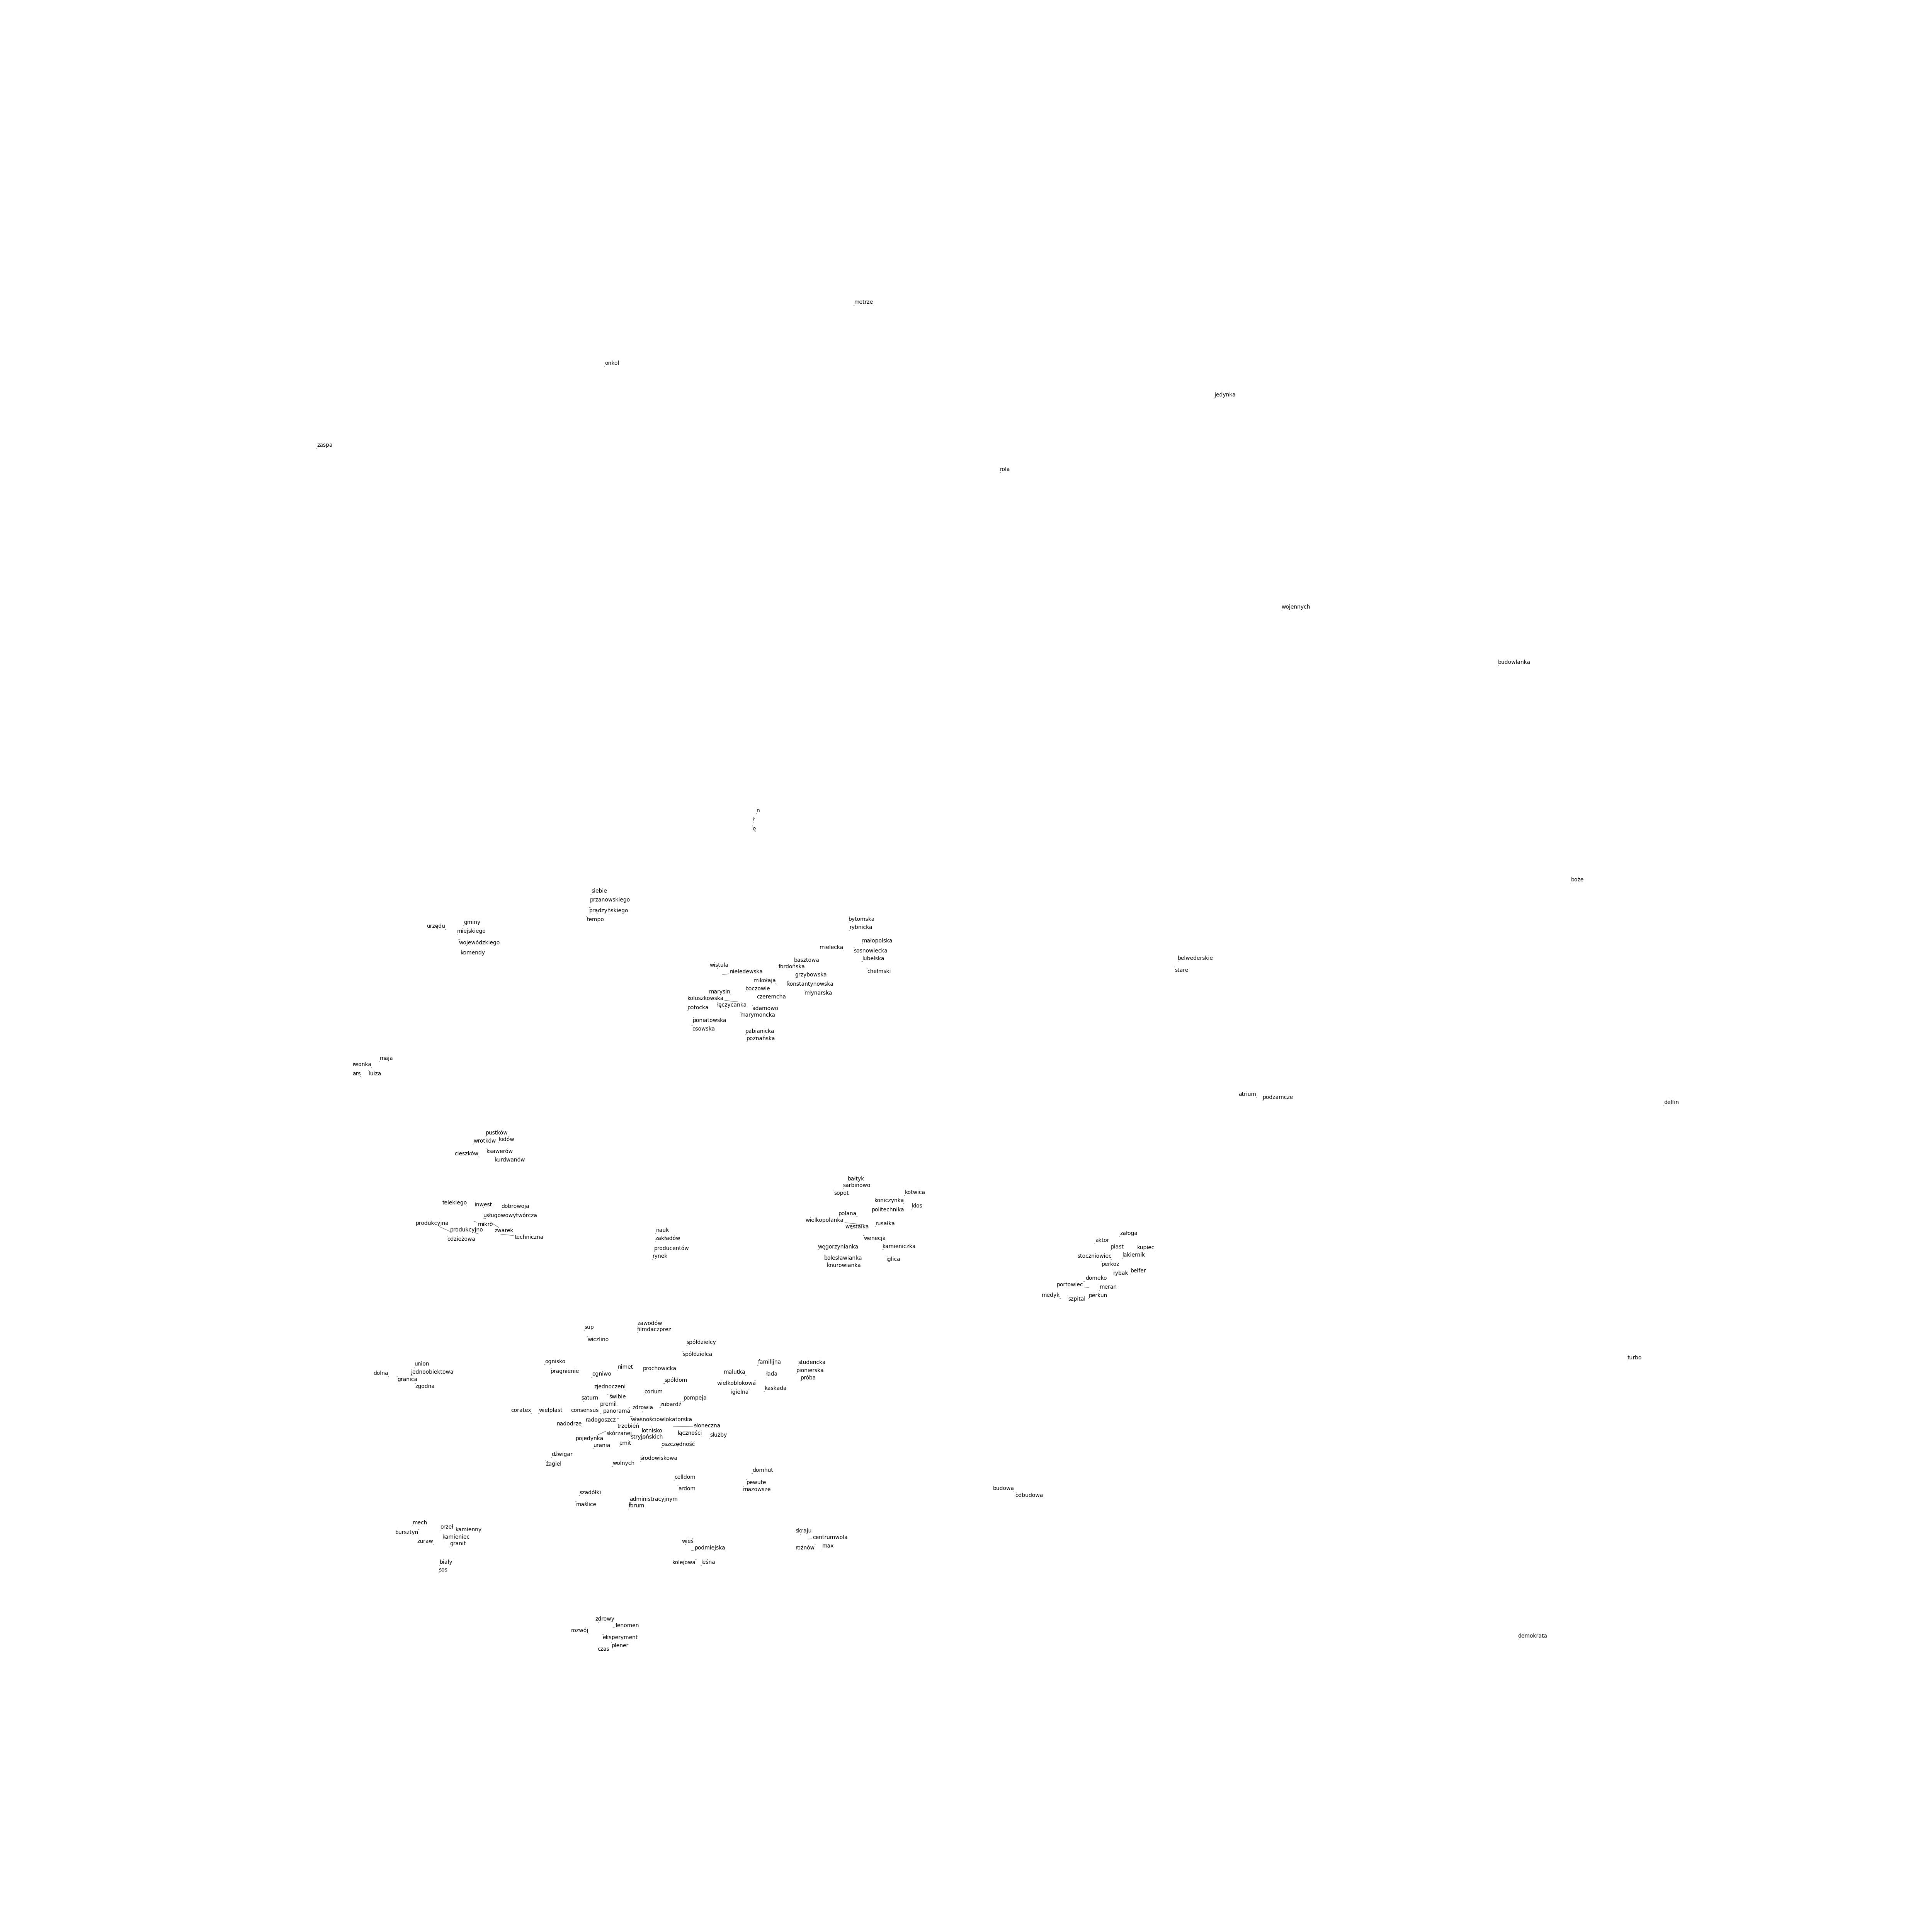

# In progress - interactive map in Bokeh

In [1]:
import pandas as pd
from bokeh.io import output_notebook
output_notebook()
bokeh_width, bokeh_height = 500,400

Loading BokehJS ...

In [2]:
df = pd.read_csv('Data from rejestr.io/Coop_Coordinates.csv')
df.head()

,id,latitude,longitude
0,1006590,52.243564,21.085238
1,990360,51.788490,20.253890
2,989448,52.275121,20.907431
3,958748,52.172124,21.010887
4,916521,52.277361,21.048672


In [5]:
lat, lon = 46.2437, 6.0251

import os 
api_key = 

In [12]:
from bokeh.io import show
from bokeh.plotting import gmap
from bokeh.models import GMapOptions

def plot(lat, lng, zoom=10, map_type='roadmap'):
    gmap_options = GMapOptions(lat=lat, lng=lng, 
                               map_type=map_type, zoom=zoom)
    p = gmap(api_key, gmap_options, title='woop', 
             width=bokeh_width, height=bokeh_height)
    show(p)
    return p

In [13]:
p = plot(lat, lon)

In [14]:
def plot(lat, lng, zoom=10, map_type='roadmap'):
    gmap_options = GMapOptions(lat=lat, lng=lng, 
                               map_type=map_type, zoom=zoom)
    p = gmap(api_key, gmap_options, title='Pays de Gex', 
             width=bokeh_width, height=bokeh_height)
    # beware, longitude is on the x axis ;-)
    center = p.circle([lng], [lat], size=10, alpha=0.5, color='red')
    show(p)
    return p

p = plot(lat, lon, map_type='terrain')


In [15]:
from bokeh.models import ColumnDataSource

def plot(lat, lng, zoom=10, map_type='roadmap'):
    gmap_options = GMapOptions(lat=lat, lng=lng, 
                               map_type=map_type, zoom=zoom)
    p = gmap(api_key, gmap_options, title='Pays de Gex', 
             width=bokeh_width, height=bokeh_height)
    # definition of the column data source: 
    source = ColumnDataSource(df)
    # see how we specify the x and y columns as strings, 
    # and how to declare as a source the ColumnDataSource:
    center = p.circle('lon', 'lat', size=4, alpha=0.2, 
                      color='yellow', source=source)
    show(p)
    return p

p = plot(lat, lon, map_type='satellite')

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : x='lon' [no close matches], y='lat' [no close matches] {renderer: GlyphRenderer(id='p1664', ...)}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords

# Load data and prepare for analysis
stop_words = stopwords.words('english')
text = ['The quick brown fox jumps over the lazy dog', 'I love to run', 'The sun will rise tomorrow', 'My favorite color is purple']

# Remove stop words
text_no_stop = [text[0].split()[-1]] + [word for word in text[1:] if word not in stop_words]

# Tokenize and remove punctuation
tokens = nltk.word_tokenize(text_no_stop)

# Convert to lowercase
lower_tokens = [token.lower() for token in tokens]

# Remove empty words
tokens = [token for token in lower_tokens if len(token) > 0]

# Vectorize words
vectorizer = OneHotEncoder()
vectors = vectorizer.fit_transform(tokens)

# Clustering
kmeans = KMeans(n_clusters=5).fit(vectors)
labels = kmeans.labels_

# Cosine similarity of words
similarity_matrix = cosine_similarity(vectors, metric='cosine')

# Plot similarity matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(xlabel='words', ylabel='words')
for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        color = plt.cm.get_at(plt.cm.jet((1+similarity_matrix[i, j])*100) + 1)
        ax.annotate(f"{labels[i]} {labels[j]} ", (i, j), color=color)

plt.show()

ModuleNotFoundError: No module named 'nltk'